In [3]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Input, Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Recall, Precision
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Create Datasets

In [4]:
BATCH_SIZE = 32
IMG_SIZE = (224, 224)
TRAIN_PATH = "C:\\Users\\peter\\Documents\\SJSU\\CMPE_257_ML\\ML_SJSU_Fall_2024_Grp3\\Bananas\\Train"
TEST_PATH = "C:\\Users\\peter\\Documents\\SJSU\\CMPE_257_ML\\ML_SJSU_Fall_2024_Grp3\\Bananas\\Test"

train_dataset = tf.keras.utils.image_dataset_from_directory(
    TRAIN_PATH,
    validation_split=0.2,
    subset="training",
    seed=257,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode='binary')

validation_dataset = tf.keras.utils.image_dataset_from_directory(
    TRAIN_PATH,
    validation_split=0.2,
    subset="validation",
    seed=257,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode='binary')

test_dataset = tf.keras.utils.image_dataset_from_directory(
    TEST_PATH,
    shuffle=True,
    seed=257,
    image_size=IMG_SIZE,
    label_mode='categorical')

#Class Names
class_names = train_dataset.class_names
print(class_names)

Found 3985 files belonging to 2 classes.
Using 3188 files for training.
Found 3985 files belonging to 2 classes.
Using 797 files for validation.
Found 339 files belonging to 2 classes.


# Create Model(s)
Peter created several models to test different theories, layers, and activations functions.

## Original Model
This is the original model created. The results from this model were used in the report and presentation.

In [8]:
#Original Model Creation. Very confusing. Results form this model were used in the Presentation and Report
base_model= tf.keras.applications.resnet50.ResNet50(
                    include_top=False,
                    input_shape=(224,224,3),
                    pooling='avg',
                    weights='imagenet'
                    )

base_model.trainable = False                      #Freeze resnet model weights
inputs = Input(shape=(224, 224, 3))               #Create Input Layer
x = base_model(inputs, training=False)            # Add Input Layer
resnet_model = Sequential()                       # Initialize model builder
x = Flatten()(x)                                  # Add a flattening layer to be able to feed resnet results into less dementional layers
x = Dense(512, activation='relu')(x)              # Add a dense relu layer to process Resnet results
outputs = Dense(2, activation='softmax')(x)       # Softmax activation to ensure we get a result (either rotten or ripe)
model_original = Model(inputs, outputs)         # Add the output layer to rest of the model
model_original.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy', tf.keras.metrics.Recall(name='recall'), tf.keras.metrics.Precision(name='precision')])
model_original.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ resnet50 (Functional)                │ (None, 2048)                │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │           1,026 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,637,826 (93.99 MB)

 Trainable params: 1,050,114 (4.01 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [9]:
#Fit Original Model
epochs=#0
history_model_original = model_original.fit(train_dataset, validation_data=validation_dataset, epochs=epochs)
print(history_model_original.history)

Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 234s 2s/step - accuracy: 0.8777 - loss: 0.6127 - precision: 0.8777 - recall: 0.8777 - val_accuracy: 0.9987 - val_loss: 0.0071 - val_precision: 0.9987 - val_recall: 0.9987
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 216s 2s/step - accuracy: 0.9988 - loss: 0.0059 - precision: 0.9988 - recall: 0.9988 - val_accuracy: 1.0000 - val_loss: 0.0032 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 215s 2s/step - accuracy: 1.0000 - loss: 0.0017 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 0.9987 - val_loss: 0.0027 - val_precision: 0.9987 - val_recall: 0.9987
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 217s 2s/step - accuracy: 1.0000 - loss: 0.0012 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 1.0000 - val_loss: 0.0016 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 216s 2s/step - accuracy: 1.0000 - loss: 4.3952e-04 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 1.0000 - val

KeyboardInterrupt: 

In [164]:
# 5 epochs of the original model
history_model_original.history = {'accuracy': [0.9705236554145813, 0.99905925989151, 0.9996864199638367, 1.0, 1.0], 'loss': [0.1146116629242897, 0.00433709379285574, 0.001311403582803905, 0.0003863270685542375, 0.0002469934697728604], 'precision': [0.9705236554145813, 0.99905925989151, 0.9996864199638367, 1.0, 1.0], 'recall': [0.9705236554145813, 0.99905925989151, 0.9996864199638367, 1.0, 1.0], 'val_accuracy': [1.0, 1.0, 0.998745322227478, 0.998745322227478, 0.998745322227478], 'val_loss': [0.004559727851301432, 0.0030580887105315924, 0.003332657041028142, 0.0018367826705798507, 0.002002890221774578], 'val_precision': [1.0, 1.0, 0.998745322227478, 0.998745322227478, 0.998745322227478], 'val_recall': [1.0, 1.0, 0.998745322227478, 0.998745322227478, 0.998745322227478]}

In [ ]:
#Save Original Model
model_original_2.save("model_original_2.keras", overwrite=False)

In [6]:
# Load Original Model
model_original = keras.models.load_model("model_original.keras")

## Readable Original model
This code creates an identical model to the original model but is much more readable in terms of code. Resulsts between methods did not seem to vary.

In [8]:
#Original Model using a more readable format
resNet= tf.keras.applications.resnet50.ResNet50(
                    include_top=False,
                    input_shape=(224,224,3),
                    pooling='avg',
                    weights='imagenet'
                    )

resNet.trainable = False

model_extra_dense=tf.keras.Sequential()
model_extra_dense.add(tf.keras.layers.InputLayer(shape=(224, 224, 3)))
model_extra_dense.add(resNet)
model_extra_dense.add(tf.keras.layers.Flatten())
model_extra_dense.add(tf.keras.layers.Dense(224, activation='relu'))
model_extra_dense.add(tf.keras.layers.Dense(2, activation='softmax'))

model_extra_dense.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy', tf.keras.metrics.Recall(name='recall'), tf.keras.metrics.Precision(name='precision')])
model_extra_dense.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 2048)                │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 224)                 │         458,976 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2)                   │             450 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,047,138 (91.73 MB)

 Trainable params: 459,426 (1.75 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [9]:
#Fit Clean Build Model
epochs=7
history = model_extra_dense.fit(train_dataset, validation_data=validation_dataset, epochs=epochs)
print(history.history)

Epoch 1/7


KeyboardInterrupt: 

In [33]:
#Save Model
model_extra_dense.save("model_extra_dense.keras", overwrite=False)

In [ ]:
model_extra_dense = keras.models.load_model("model_extra_dense.keras")

## SoftMax Only
This model removes the dense layer inbetween the flatenning layer and softmax layer. Similar results to the original model

In [7]:
#Softmax Only (224 Dense Layer removed) Similar preformance, less training time

resNet.trainable = False

model_softmax=tf.keras.Sequential()
model_softmax.add(tf.keras.layers.InputLayer(shape=(224, 224, 3)))
model_softmax.add(resNet)
model_softmax.add(tf.keras.layers.Flatten())

model_softmax.add(tf.keras.layers.Dense(2, activation='softmax'))

model_softmax.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy', tf.keras.metrics.Recall(name='recall'), tf.keras.metrics.Precision(name='precision')])
model_softmax.summary()

NameError: name 'resNet' is not defined

In [ ]:
#Fit Model
epochs=7
history_softmax = model_softmax.fit(train_dataset, validation_data=validation_dataset, epochs=epochs)
print(history.history)

In [ ]:
# 10 epochs of softmax only. 
history_softmax = {'accuracy': [0.9971635937690735, 0.9996848702430725, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 
           'loss': [0.009563618339598179, 0.0031754430383443832, 0.0009719916852191091, 0.0005832828464917839, 0.0003618265618570149, 0.0002419435913907364, 0.0001947656273841858, 0.0001857724564615637, 0.000122249242849648, 9.7229378297925e-05], 
           'precision_1': [0.9971635937690735, 0.9996848702430725, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 
           'recall_1': [0.9971635937690735, 0.9996848702430725, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 
           'val_accuracy': [0.9987389445304871, 1.0, 1.0, 0.9987389445304871, 0.9987389445304871, 1.0, 0.9987389445304871, 0.9987389445304871, 0.9987389445304871, 0.9987389445304871], 
           'val_loss': [0.005802054889500141, 0.00281628523953259, 0.0018034775275737047, 0.0022962286602705717, 0.002143666846677661, 0.0018636492313817143, 0.0020668571814894676, 0.0019938210025429726, 0.001982423011213541, 0.0019023945787921548], 
           'val_precision_1': [0.9987389445304871, 1.0, 1.0, 0.9987389445304871, 0.9987389445304871, 1.0, 0.9987389445304871, 0.9987389445304871, 0.9987389445304871, 0.9987389445304871], 
           'val_recall_1': [0.9987389445304871, 1.0, 1.0, 0.9987389445304871, 0.9987389445304871, 1.0, 0.9987389445304871, 0.9987389445304871, 0.9987389445304871, 0.9987389445304871]}


In [28]:
#Save Model
model_softmax.save("model_softmax.keras", overwrite=False)

In [34]:
model_softmax = keras.models.load_model("model_softmax.keras")

## Sigmoid Model
Created after the presentation to test if sigmoid will give different results to softmax in the last output layer. Taking inspiratino from Pushpals Bellpepper model.

In [7]:
#Sigmoid Model Creation
resNet= tf.keras.applications.resnet50.ResNet50(
                    include_top=False,
                    input_shape=(224,224,3),
                    pooling='avg',
                    weights='imagenet'
                    )

resNet.trainable = False

model_sigmoid=tf.keras.Sequential()
model_sigmoid.add(tf.keras.layers.InputLayer(shape=(224, 224, 3)))
model_sigmoid.add(resNet)
model_sigmoid.add(tf.keras.layers.Flatten())
model_sigmoid.add(tf.keras.layers.Dense(512, activation='relu'))
model_sigmoid.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model_sigmoid.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.Recall(name='recall'), tf.keras.metrics.Precision(name='precision')])
model_sigmoid.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 2048)                │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,637,313 (93.98 MB)

 Trainable params: 1,049,601 (4.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [9]:
#Fit Model only completing 10 epochs as a quick test
epochs=10
history_model_sigmoid = model_sigmoid.fit(train_dataset, validation_data=validation_dataset, epochs=epochs)
print(history_model_sigmoid.history)

Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 407s 4s/step - accuracy: 0.9194 - loss: 0.1711 - precision: 0.9230 - recall: 0.9104 - val_accuracy: 0.9975 - val_loss: 0.0115 - val_precision: 1.0000 - val_recall: 0.9950
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 239s 2s/step - accuracy: 0.9957 - loss: 0.0145 - precision: 0.9958 - recall: 0.9957 - val_accuracy: 0.9987 - val_loss: 0.0032 - val_precision: 0.9975 - val_recall: 1.0000
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 252s 3s/step - accuracy: 1.0000 - loss: 0.0013 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 0.9987 - val_loss: 0.0018 - val_precision: 1.0000 - val_recall: 0.9975
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1534s 15s/step - accuracy: 1.0000 - loss: 2.3404e-04 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 0.9987 - val_loss: 0.0016 - val_precision: 1.0000 - val_recall: 0.9975
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 250s 2s/step - accuracy: 1.0000 - loss: 1.3808e-04 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 0.9987

In [ ]:
history_model_sigmoid.history = {'accuracy': [0.9752195477485657, 0.9962359070777893, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 'loss': [0.05738840997219086, 0.0125226816162467, 0.0007898104377090931, 0.00022795952099841088, 0.00014536164235323668, 0.00011567893670871854, 9.500471060164273e-05, 7.98375767772086e-05, 6.955295975785702e-05, 5.833069371874444e-05], 'precision': [0.9785624146461487, 0.9962429404258728, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 'recall': [0.9718221426010132, 0.9962429404258728, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 'val_accuracy': [0.9974905848503113, 0.998745322227478, 0.998745322227478, 0.998745322227478, 0.998745322227478, 0.998745322227478, 0.998745322227478, 0.998745322227478, 0.998745322227478, 0.998745322227478], 'val_loss': [0.011536464095115662, 0.0031599991489201784, 0.001776594901457429, 0.0015608272515237331, 0.0015387061284855008, 0.001484992215409875, 0.0014912090264260769, 0.0014309277758002281, 0.0013573915930464864, 0.0013875665608793497], 'val_precision': [1.0, 0.9975000023841858, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 'val_recall': [0.9949874877929688, 1.0, 0.9974937438964844, 0.9974937438964844, 0.9974937438964844, 0.9974937438964844, 0.9974937438964844, 0.9974937438964844, 0.9974937438964844, 0.9974937438964844]}

In [10]:
model_extra_dense_history = {'accuracy': [0.959234893321991, 0.9978049397468567, 0.9996864199638367, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 'loss': [0.14208541810512543, 0.008116188459098339, 0.0027705177199095488, 0.001131783239543438, 0.000442600081441924, 0.00029683418688364327, 0.00022397428983822465, 0.0001828796521294862, 0.00013916460738983005, 0.00011495558283058926, 9.587500244379044e-05, 8.254688873421401e-05, 6.888183270348236e-05, 5.971166319795884e-05, 5.268056338536553e-05, 4.629185059457086e-05, 4.077087214682251e-05, 3.650696817203425e-05, 3.241986996727064e-05, 2.886941729229875e-05, 2.6347956008976325e-05, 2.3739596144878305e-05, 2.1429235857794993e-05, 1.9300414351164363e-05, 1.7649708752287552e-05, 1.6172658433788456e-05, 1.4862485841149464e-05, 1.3534882782550994e-05, 1.2386832167976536e-05, 1.1367289516783785e-05], 'precision': [0.959234893321991, 0.9978049397468567, 0.9996864199638367, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 'recall': [0.959234893321991, 0.9978049397468567, 0.9996864199638367, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 'val_accuracy': [0.9974905848503113, 0.9962359070777893, 1.0, 0.998745322227478, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 'val_loss': [0.01413825061172247, 0.009593343362212181, 0.002046218141913414, 0.0033119136933237314, 0.0018567447550594807, 0.0017233495600521564, 0.0016249875770881772, 0.0015280199004337192, 0.0013804389163851738, 0.001147319097071886, 0.001042625866830349, 0.001023796503432095, 0.0009157676831819117, 0.0008664033375680447, 0.0008100027334876359, 0.0008023394038900733, 0.0007614305941388011, 0.0007281512953341007, 0.0006752872723154724, 0.0006244209944270551, 0.0006291605532169342, 0.0006119016325101256, 0.0005853092879988253, 0.000550013268366456, 0.0005174137186259031, 0.0005079270340502262, 0.0004831137484870851, 0.00047522399108856916, 0.0004610424512065947, 0.00044784240890294313], 'val_precision': [0.9974905848503113, 0.9962359070777893, 1.0, 0.998745322227478, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 'val_recall': [0.9974905848503113, 0.9962359070777893, 1.0, 0.998745322227478, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]}

# Visualizing Results

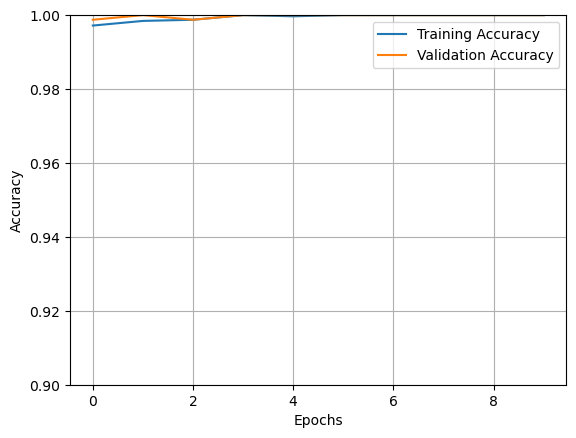

In [17]:
import matplotlib.pyplot as plt
plt.plot(history_model_original.history['accuracy'], label='Training Accuracy')
plt.plot(history_model_original.history['val_accuracy'], label='Validation Accuracy')
plt.axis(ymin=0.9,ymax=1)
plt.grid()
plt.xlabel('Epochs')  # Label for the x-axis
plt.ylabel('Accuracy')  # Label for the y-axis
plt.legend()

fig1 = plt.gcf()

fig1.savefig('softmax_accuracy.png', dpi=300)

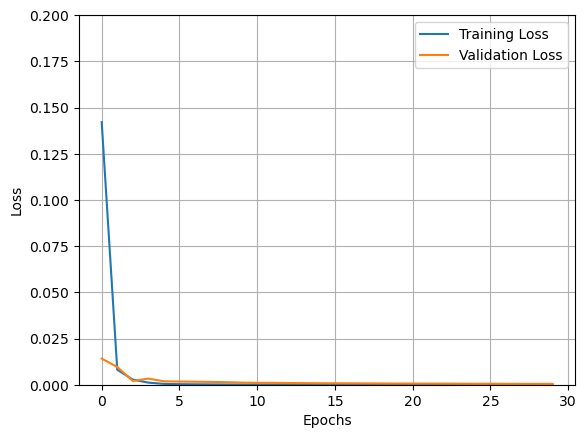

In [12]:
#Plot Training Results
plt.plot(model_extra_dense_history['loss'], label='Training Loss')
plt.plot(model_extra_dense_history['val_loss'], label='Validation Loss')
#plt.plot(history['val_recall_1'])
#plt.plot(history['val_precision_1'])
plt.axis(ymin=0.0,ymax=0.2)
plt.grid()
plt.xlabel('Epochs')  # Label for the x-axis
plt.ylabel('Loss')  # Label for the y-axis
plt.legend()

fig2 = plt.gcf()

fig2.savefig('extradense_loss.png', dpi=300)

In [ ]:
#Load fndividual file for testing
filelocation = r"C:\Users\peter\Documents\SJSU\CMPE_257_ML\ML_SJSU_Fall_2024_Grp3\test_bananas\B\Ripe\freshBanana (31).jpg"

img = tf.keras.utils.load_img(
    filelocation, target_size=(224, 224)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

## Testing Against Another Dataset

The test dataset is taken from a seperate dataset https://www.kaggle.com/datasets/atrithakar/banana-classification

In [4]:
#Prep Test True Values
y_test = np.concatenate([y for x, y in test_dataset], axis=0)
y_test_label =[]

for label in y_test:
    y_test_label.append(class_names[np.argmax(label)])

In [7]:
#Predict on Test Dataset
predictions = model_original.predict(test_dataset)

y_pred_list =[]

for pred in predictions:
    y_pred_list.append(class_names[np.argmax(pred)])

11/11 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step


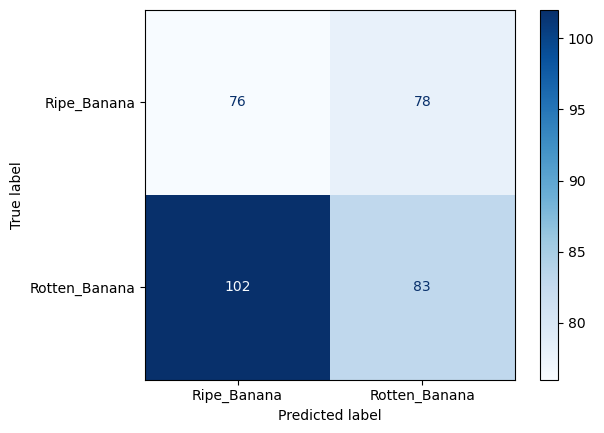

In [21]:
# Display Metrics of Test set
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test_label, y_pred_list)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
#plt.subplots_adjust(left=0.15, right=0.85, top=0.85, bottom=0.15)

fig3 = plt.gcf()
fig3.savefig('confidence_extradense.png', dpi=300, bbox_inches='tight')